In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.19.1


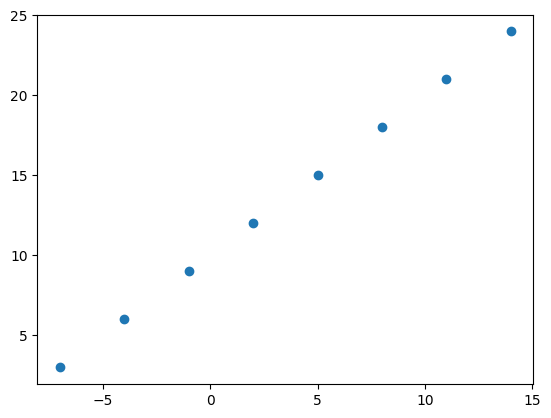

In [3]:
# Creating Features/Predictors

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizing the relationship

plt.scatter(X, y)

In [4]:
## We manually saw
y == X + 10

# These are the type of relations we want our neural network to find.

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [5]:
# Creating a demo tensor for our housing price prediction.

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with tensorflow

- Creating a model - defining the input and output layers, as well as the hidden layers of a deep learning model.

- Compiling a model - defining the loss function and evaluation metrics.

- Fitting a model -  letting the model try to find the patterns between X and y (features and labels)

In [7]:
# set seed
tf.random.set_seed(42)

# create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

## This is same as " model = tf.keras.Sequential()
##                   model.add(tf.keras.layers.Dense(1))"

## So, we can add layers in our neural network by adding them in a list and calling "tf.keras.Sequential()" over that list or by using model.add() for each new layer.

# Compiling the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

## mae is short for mean absolute error.

# Fit the model

# model.fit(X, y, epochs = 5) # this will break with TensorFlow 2.7.0+

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 14.7430 - mae: 14.7430
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.6105 - mae: 14.6105
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.4780 - mae: 14.4780
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.3455 - mae: 14.3455
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.2130 - mae: 14.2130


In [8]:
# Checking X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

- #### Note: we used only 5 epochs to train our model and that's why our predictions are far off from the correct value.
- #### If we would have used 100 epochs our result would have been very precise.

In [9]:
y_pred= model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[-3.0121913]], dtype=float32)

## Improving our model.

### we can improve our model, by altering the steps we took to create a model.

1) **Creating a model** - here, we might add more layers, increase the number of neurons within each of the hidden layers, we can also change the activation function.

2) **Compiling a moddel** - Here, we might change the optimization function or perhaps the **learning rate** of the optimization function.

3) **Fitting a model** - Here, we might fit a model for more epochs(allowing the model to learn for more number of times) or on more data(giving the model more examples to learn from)

In [10]:
# Rebuilding the model and increasing the number of epochs.

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])


# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100, verbose = 0) # verbose = 0, is used so that no output is shown on the screen.

In [11]:
y_pred= model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[29.854334]], dtype=float32)

## Prediction obtained is much better then the previous model with 5 epochs. However, we can still improve our model. 

### **Common ways of improving a deep learning model include,**

- Adding Layers

- Increase the number of neurons

- Changing the activation function

- Changing the optimization function

- Changing the learning rate.(most important)

- Fitting our model on more data.

In [12]:
# Rebuilding the model again to improve performance.

model = tf.keras.Sequential([tf.keras.layers.Dense(10), tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])


# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100, verbose = 0) # verbose = 0, is used so that no output is shown on the screen.

In [13]:
y_pred= model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[25.760561]], dtype=float32)

### Note:

- When we get low mae value but our predictions are not good that simply means our model is overfitting.
- Overfitting means, our model is working great on the data it was trained on but not working well with the data it has not seen before.
- Models must be evaluated on the data it has not seen before.

--- 

### When evaluating our model, we must visualize

- The data

- The model itself

- The training of a model.

- The prediction of a model.

# Creating a bigger dataset.

In [14]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

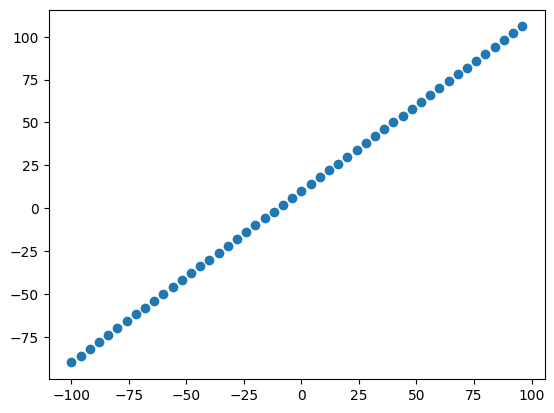

In [16]:
# visualize data

plt.scatter(X, y)

- #### While creating a model we fit our data on training dataset which is usually 70% of the entire data.
- #### We tune our model on 10-15% of the data and it is called validation dataset.
- #### Finally, we evaluate our model on test set which is also on 10-15% of the total data.
- #### Normally, we just use training and test dataset.

In [17]:
# checking the lenght of the dataset.
len(X)

50

In [18]:
# Spliting data into training and test data set.
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

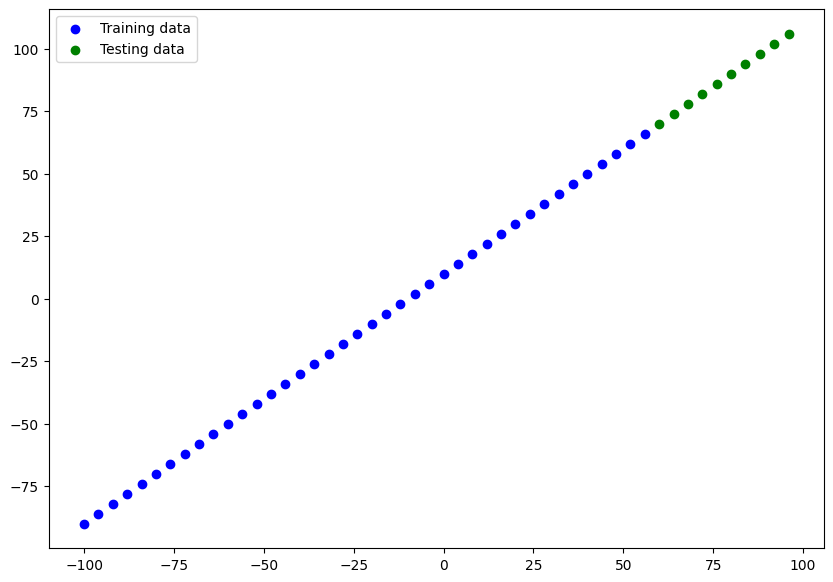

In [19]:
# Visualizing the data
plt.figure(figsize =(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# plot test data in green.
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
plt.legend()

In [20]:
# Now, build a neural network for our data.

model = tf.keras.Sequential([tf.keras.layers.Dense(10), tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs = 100, verbose = 0)

In [21]:
y_pred= model.predict(np.array([280.0]))
y_pred

# Prediction is not that good.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[496.9742]], dtype=float32)

## Creating a model which autimatically builds by defining the input_shape argument in the input layer.

In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                          tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
                          tf.keras.layers.Dense(1, name = "output_layer")
                          ], name="model_1")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
model.summary()

/Users/harish./Desktop/git_repos/new_tfhub_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

## Explanation

- ### Total params: Total number of parameters in the model.
- ### Trainable params: Parameters (Patterns) the model can update as it trains.
- ### Traianbale parameters are **Weights** and **Biases** in neural network.
- ### Non-trainable params: aren't updated during training. These are typically seen when we tend to use a model that has been trained before and have already learned the parameters.
- ### There is a rule to calculate the number of trainable parameters between two layers and if we want trainable parameters between the entire network we can sum our values

## **Example:**

- Input layer: 4 units.
  
- Hidden layer 1: 16 units.

- Hidden layer 2: 8 units.

- Hidden layer 3: 4 units.

- Output layer: 2 units.

### **Solution:**

- Every connection between two neurons between two layers have a separate weight.

- Every neuron in a layer have a separate bias.

- So, we have input layer with 4 neurons and all these 4 neurons have a connection with the 16 neurons in the next layer. Also, every neuron(16) in the hidden layer have a  separate bias.

- Total number of trainable parameters between the first two layers is **4*16 + 16 = 80**.

- Defined formula for this to solve it quickly given as $(n+1)*m$

### where 
- n = number of neurons in input layer.
- m = number of neurons in output layer.
- Therefore, our solution is given as **(4+1)*16 + (16+1)*8 + (8+1)*4 + (4+1)*2 = 262**

In [23]:
# Let's fit our model to the training data.

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0) 

In [24]:
## Summary of our model.
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

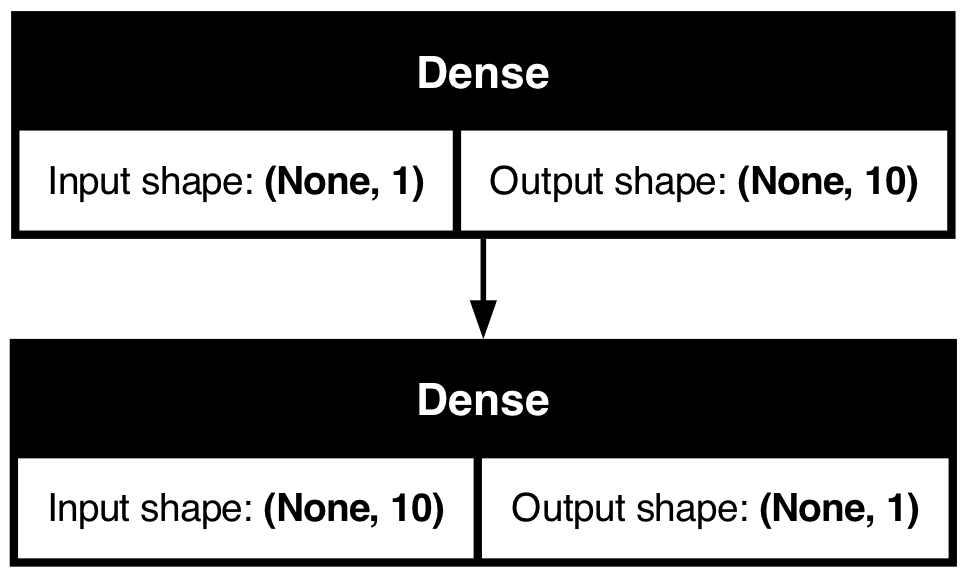

In [25]:
## One more way to visualize our model is given as
plot_model(model=model, show_shapes=True)

## Visualizing our model's prediction.

- while visualizing predictions, it's a good idea to plot them against the true values.

- often shown as "y_test" VS "y_pred"



In [26]:
# Making some predictions

y_pred = model.predict(X_test)
X_test, y_pred, y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 array([[37.201935],
        [39.57638 ],
        [41.95083 ],
        [44.325275],
        [46.69973 ],
        [49.074173],
        [51.448624],
        [53.82307 ],
        [56.197517],
        [58.571968]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [27]:
## creating a plotting function so that we can use it again and again.

def plot_predictions(train_data = X_train,
                     train_labels = y_train
                    , test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):

  """
  plot training data, test data and compairing predictions with true value
  """
  plt.figure(figsize= (10,7))
  # plot training data in blue.
  plt.scatter(train_data, train_labels, c ="b", label = "Training data")
  # Plot testing data in green.
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plotting models prediction in red.
  plt.scatter(test_data, predictions, c ="r", label = "Predictions")
  # show legend
  plt.legend();

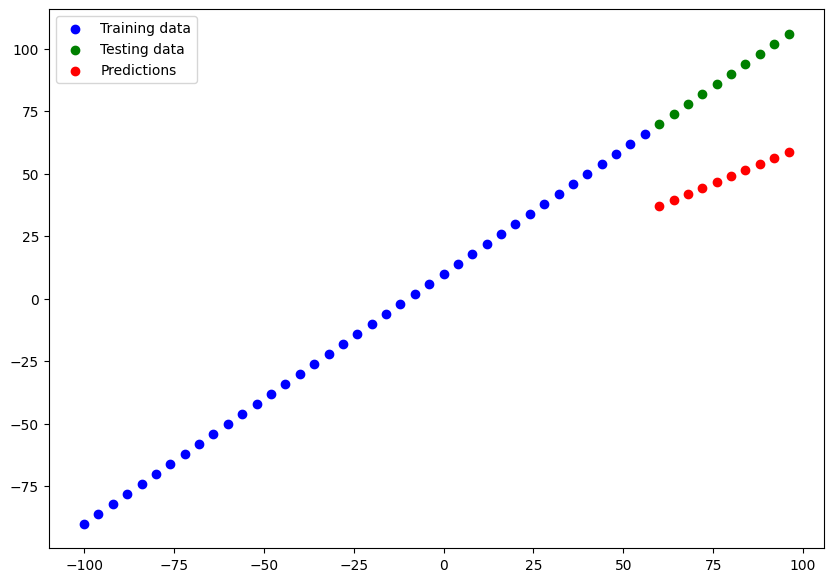

In [28]:
plot_predictions(train_data = X_train,
                     train_labels = y_train
                     ,test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

## Evaluating our models prediction with regression evaluation metric.

- Depending on the problem we are working on, there will be different evaluation metrics to evaluate your model's performance.

- Note: Since, we are working on regression, two of the main metrics we usually deal with are:

> MAE: Mean absolute error(`tf.keras.metrics.MeanAbsoluteError()`)
>
> MSE: Mean Square error(`tf.keras.metrics.MeanSquaredError()`)

In [29]:
# Evaluating the model on the test dataset.

model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 40.1130 - mae: 40.1130


[40.1130485534668, 40.1130485534668]

In [30]:
# As a metric
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mse_metric = tf.keras.metrics.MeanSquaredError()

In [31]:
mae_metric.update_state(y_true = y_test, y_pred = y_pred)
mse_metric.update_state(y_test, y_pred)

In [32]:
print("MAE:", mae_metric.result().numpy())
print("MSE:", mse_metric.result().numpy())

MAE: 40.11305
MSE: 1630.8567


In [33]:
# Making some functions for mae and mse.

def mae(y_true, y_pred):
    metric = tf.keras.metrics.MeanAbsoluteError()
    metric.update_state(y_true, y_pred)
    return metric.result().numpy()


def mse(y_true, y_pred):
    metric = tf.keras.metrics.MeanSquaredError()
    metric.update_state(y_true, y_pred)
    return metric.result().numpy()

In [34]:
mae(y_test, y_pred), mse(y_test,y_pred)

(np.float32(40.11305), np.float32(1630.8567))

# Running experiments to improve our model.

---

### We can improve our model by

* getting more data.

* Making our model more complex(increaing the number of layers or neurons)

* Training our model for longer.


### Experimenting with the data:

* model_1: Building a model with 1 layer and 100 epochs (Like our original model).

* model_2: second model with 2 layers and 100 epochs.

* model_3: Third model with 2 layers and 500 epochs.

In [35]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [36]:
### Building model_1.

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

## Compiling the model.

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])


# fitting the model

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


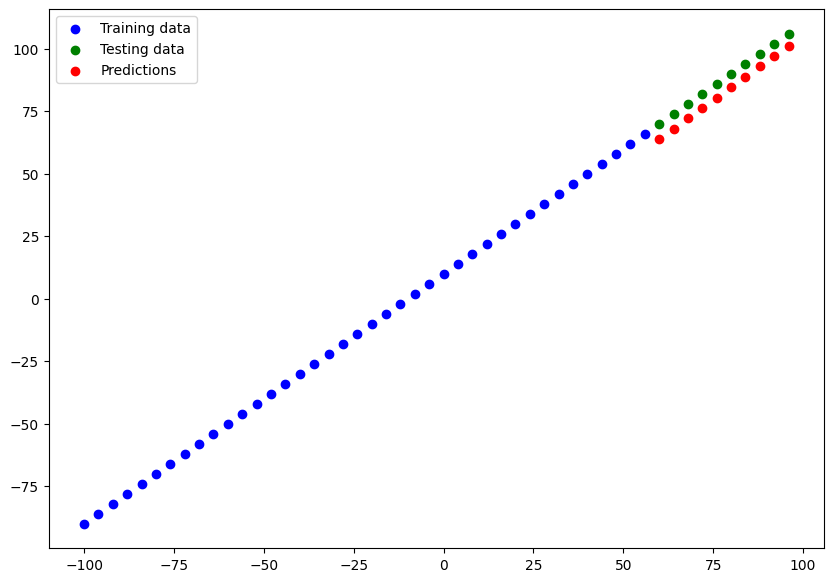

In [37]:
### making predictions and visualizing it.

y_pred_1 = model_1.predict(X_test)

plot_predictions(predictions = y_pred_1)

In [38]:
y_test, y_pred_1

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 63.803802],
        [ 67.96285 ],
        [ 72.121895],
        [ 76.280945],
        [ 80.43999 ],
        [ 84.59904 ],
        [ 88.75808 ],
        [ 92.91712 ],
        [ 97.07617 ],
        [101.235214]], dtype=float32))

In [39]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(np.float32(5.4804893), np.float32(30.244452))

In [40]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


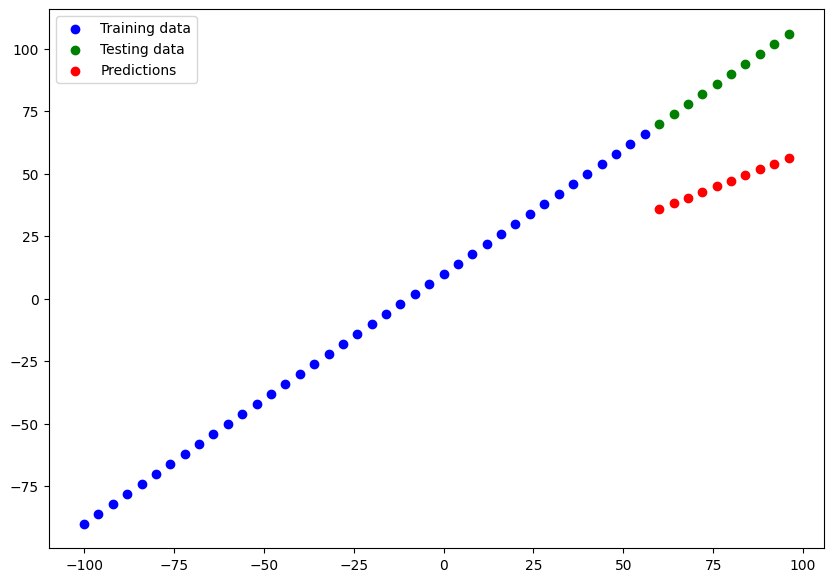

In [41]:
### making predictions and visualizing it.

y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [42]:
y_test, y_pred_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[35.90857 ],
        [38.170597],
        [40.43263 ],
        [42.694656],
        [44.956684],
        [47.218716],
        [49.480743],
        [51.742775],
        [54.004803],
        [56.266834]], dtype=float32))

In [43]:
# Evaluating our model 2

mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(np.float32(41.9123), np.float32(1781.5602))

In [44]:
##  Building the model:3
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)])

# Compiling the model.

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fitting the model

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 500, verbose = 0)

In [45]:
### making predictions and visualizing it.

y_pred_3 = model_3.predict(X_test)
y_test, y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[38.730938],
        [40.88968 ],
        [43.048416],
        [45.207157],
        [47.3659  ],
        [49.52464 ],
        [51.68338 ],
        [53.84212 ],
        [56.000862],
        [58.159603]], dtype=float32))

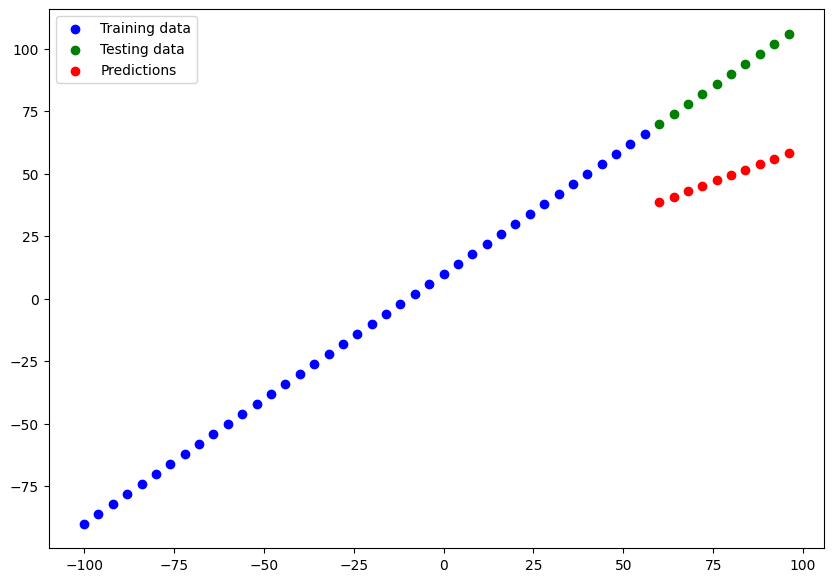

In [46]:
plot_predictions(predictions = y_pred_3)

## This plot shows that this model is the worst and this is probably due to the fact that we have trained
## our model for too long and hence our model is overfitting.

In [47]:
## Evaluating our model
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(np.float32(39.55473), np.float32(1592.5461))

### Compairing the results of our experiments.

In [48]:
model_results = [["model_1", mae_1, mse_1], ["model_2", mae_2, mse_2], ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,5.480489,30.244452
1,model_2,41.912300,1781.560181
2,model_3,39.554729,1592.546143


### Apart from creating a table like this, we can also use other tools to track our model results such as

1) TensorBoard: it is a component of tensorflow library to help track modelling experiments.

2) weights & Biases: is a tool to track all kinds of machine learning experiments and it can be used directly with TensorBoard.

Note: Weights & Biases is a tool outside of tensorflow but it can be used with tensorflow.

---

# Saving Models in TensorFlow / Keras

- Saving our model allows us to use our model outside of google colab (or Jupyter Notebook or whereever it is trained) as in web applications, mobile applications and so on.

- When training models in TensorFlow/Keras, there are several formats and options available for saving, depending on what you need to preserve.

---

## 1. TensorFlow SavedModel Format (Recommended)
- Default format in TensorFlow.  
- Produces a folder containing:
  - The **model architecture** (layer structure).  
  - The **weights** (learned parameters).  
  - The **training configuration** (optimizer, loss, metrics).  
- Best suited for production and deployment, and can be used with TensorFlow Serving, TensorFlow Lite, or TensorFlow.js.  
- Does not require any specific file extension.

---

## 2. HDF5 Format (`.h5` / `.keras`)
- Legacy format from original Keras.  
- Stores everything in a **single file**.  
- Contains architecture, weights, and training configuration.  
- Easier to share as one file.  
- Since TensorFlow 2.12, the `.keras` extension is preferred over `.h5`.

---

## 3. Weights Only
- Saves just the learned parameters of the model.  
- Does not include architecture or training setup.  
- Useful for transfer learning or fine-tuning when the model design is already known and re-created separately.

---

## 4. Architecture Only
- Saves only the design (layer structure) of the model, without weights.  
- Allows you to recreate the model layout but requires separate weight loading.  
- Commonly saved in JSON or YAML formats.

---

## 5. Checkpointing During Training
- Instead of saving only once, models can be saved automatically at intervals during training.  
- Useful for keeping the **best-performing model** or for resuming training later.  
- Typically configured to save after every epoch or when validation metrics improve.

---

## 🔑 Summary Table

| Format               | File Type         | What it Saves                        | Best Use Case                                |
|----------------------|------------------|---------------------------------------|----------------------------------------------|
| **SavedModel**       | Directory (no ext) | Architecture + Weights + Config     | Deployment, production, TensorFlow ecosystem |
| **HDF5 / .keras**    | `.h5` / `.keras` | Architecture + Weights + Config     | Portability, sharing, legacy compatibility   |
| **Weights Only**     | `.h5`            | Only learned parameters              | Transfer learning, fine-tuning               |
| **Architecture Only**| `.json` / `.yaml`| Only model design                    | Sharing structure without weights            |
| **Checkpointing**    | `.h5` / `.keras` | Depends on configuration             | Save best model or resume training           |

---

✅ **Best Practice:**  
- Use **SavedModel** for deployment and long-term storage.  
- Use **`.keras`** (or `.h5`) for quick sharing and backward compatibility.  
- Use **weights-only** for transfer learning.  


In [49]:
# Saving our model_1 with HDF5 format

model_1.save("first_model.keras")

In [50]:
# Loading a Saved Model format model

# Get the path of the file created after saving the model and use it in "".
loaded_saved_format = tf.keras.models.load_model("first_model.keras")


# we are using this to check whether this is the same model or not.
loaded_saved_format.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [51]:
# Matching results


y_pred_1 = model_1.predict(X_test)

load_pred_1 = loaded_saved_format.predict(X_test)

y_pred_1.squeeze(), load_pred_1.squeeze(), load_pred_1.squeeze() == y_pred_1.squeeze()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


(array([ 63.803802,  67.96285 ,  72.121895,  76.280945,  80.43999 ,
         84.59904 ,  88.75808 ,  92.91712 ,  97.07617 , 101.235214],
       dtype=float32),
 array([ 63.803802,  67.96285 ,  72.121895,  76.280945,  80.43999 ,
         84.59904 ,  88.75808 ,  92.91712 ,  97.07617 , 101.235214],
       dtype=float32),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]))

# Now, Going for more Complex problems.

- Downloading a medical cost personal dataset from kaggle.

- Note: Kaggle is one of the most famous website for datascience competitions and one of the best place to find datasets.

In [52]:
# Loading the data directly from github.
## To get a link like this from github, go to the dataset on github. Then open it and on the right hand side you'll find a "raw" option and
## click on that and once it's open copy the complete url from google bar.
Insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
Insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## First we have to prepare our data before feeding it in a neural network.

In [53]:
Insurance["age"].dtype, Insurance["sex"].dtype,Insurance["bmi"].dtype,Insurance["children"].dtype,Insurance["smoker"].dtype, Insurance["region"].dtype, Insurance["charges"].dtype

(dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'))

In [54]:
## columns "sex", "region", and "smoker" are of object datatype and we need to convert them into numerical format to feed in NN.

## So, we are going to use one-hot encoing to convert our categorical data into numerical.

## using pandas built in function to do that for us.

Insurance = pd.get_dummies(Insurance)
Insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [55]:
## Creating x and y for our model.
y = Insurance["charges"]
x = Insurance.drop("charges", axis = 1)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [56]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Now we have to divide our data into training and test datasets and since our data is in a structured format, we can use a function to do that for us.
- Dividing our data into 80% training and 20% testing (test_size = 0.2, specifies test dataset of 20 %).
- random-state is used so that we get the same split each time.

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

len(x), len(x_train), len(x_test)

(1338, 1070, 268)

## Now, building a neural network for our data.

In [58]:
tf.random.set_seed(42)
regression_model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)])

# Compiling the model
regression_model.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.SGD(),
                         metrics = ["mae"])

# fitting the model

regression_model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 8684.2373 - mae: 8684.2373  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 7575.2070 - mae: 7575.2070
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 7483.4912 - mae: 7483.4912
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 7712.6743 - mae: 7712.6743
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 7550.3374 - mae: 7550.3374
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 7468.6660 - mae: 7468.6660
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 7495.4204 - mae: 7495.4204
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 7759.4062 - mae: 7759.4062
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 7758.9189 - mae: 7758.9189
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 7754.6626 - mae: 7754.6626
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 7506.5117 - mae: 7506.5117
Epoch 12/100
34/34 ━━━━━━━━━

## Evaluating the results of our model

In [59]:
regression_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 6060.4370 - mae: 6060.4370


[6060.43701171875, 6060.43701171875]

In [60]:
y_train.mean(), y_train.median()

(np.float64(13346.089736364485), np.float64(9575.4421))

## The average charge value is 13346 and our model is giving values which are approximately 7023 off from the true values. So, our model is not performing well. Hence, we need to improve our model.

In [61]:
## Trying to improve our model by some variations in the original model.
## First adding a layer.

tf.random.set_seed(42)

update_regression = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)])

update_regression.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# Note: when we used optimizer "SGD" it gave us an error as "mae = nan". So, we used optimizer "Adam" and it worked.
update_regression.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 13307.1855 - mae: 13307.1855
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 13118.8047 - mae: 13118.8047
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 12742.8652 - mae: 12742.8652
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 12007.5547 - mae: 12007.5547
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 10785.1035 - mae: 10785.1035
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 9285.4082 - mae: 9285.4082
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 8011.6494 - mae: 8011.6494
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 7486.5688 - mae: 7486.5688
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 7419.4839 - mae: 7419.4839
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 7397.8262 - mae: 7397.8262
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 7376.8989 - mae: 7376.8989
Epoch 12/100
34/34 ━

In [62]:
update_regression.evaluate(x_test, y_test)

## Mae value decreased but it is still very large.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 4656.7388 - mae: 4656.7388


[4656.73876953125, 4656.73876953125]

In [63]:
## So, now trying to train our model for a longer time.
tf.random.set_seed(42)
update2_regression = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])


update2_regression.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["mae"])

# Note: we have create a training_curve variable to track our training.
training_curve = update2_regression.fit(x_train, y_train, epochs = 200, verbose = 0)

In [64]:
## Evaluating the model

update2_regression.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 3398.8804 - mae: 3398.8804


[3398.88037109375, 3398.88037109375]

# Creating a plot to track our training.

Text(0.5, 0, 'epochs')

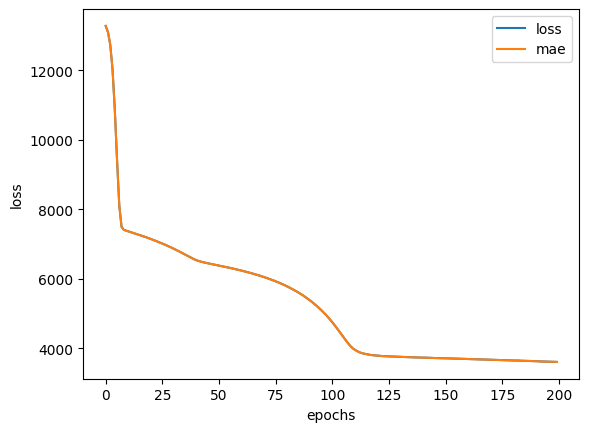

In [65]:
pd.DataFrame(training_curve.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### This plot show that we didn't needed to train our model for 200 epochs and epochs around 150 would have produced the similar results.

## Note:  The number of epochs we should use to train our model simply depends on the problem we are trying to solve. But, we can use something called "EarlyStopping" which is tensorflow component that we can use in our model to stop training once it stops improving a certain metric.

- Data Preprocessing (Normalisation and Standarisation)
  
- Normalisation is a technique used in machine learning with the goal to change the numeric columns in the dataset to have a common scale without distorting differences in the range of values.

In [67]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


<Axes: ylabel='Frequency'>

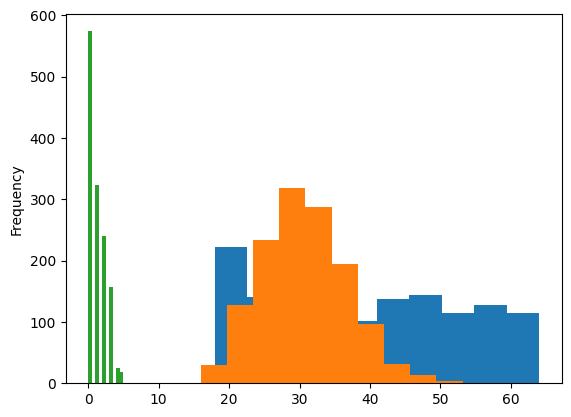

In [68]:
## In our dataset we have three columns with numerical values namely "age", "childre", and "bmi".

x["age"].plot(kind = "hist")
x["bmi"].plot(kind = "hist")
x["children"].plot(kind = "hist")


# From this plot we can clearly see the difference between the scale of all the three numerical columns. So, we need to normalise these three columns.
# Normalisation will convert the values in these columns into the range of 0 and 1.

- ### In terms of scaling neural network tend to prefer normalisation. But we could try both to check which performs better.
- ### Performing previous data prepration task again because we will perform normalisation on the complete dataset and then we will split it up.

In [69]:
Insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
Insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
y = Insurance["charges"]
x = Insurance.drop("charges", axis = 1)

In [71]:
## Now, we will perform normalisation on the three columns in x.
## to prepare our data we use scikit-learn.

# creating a column transfer to perform normalisation.

ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                          (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker","region"]))

## Note: we are using a minmaxscaler, which converts value between 0 & 1.
## Note: we can perform standarisation in the similar way, we just have to change "MinMaxScaler" to " StandardScaler".

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


# Fitting the column transformer to our training data.

ct.fit(x_train)

## Always perform scaling on training and test data separately. So,

x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

In [72]:
x_train[0]

## Here, we have a list with 11 values. Actually every row of the table has been converted into a list and the it's values represents column wise values.

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [73]:
x_train.shape, x_test.shape

## This shows our x_train had 1070 rows and 11 columns.

((1070, 11), (268, 11))

In [74]:
## Now, we can use this data directly to build a neural network model.

## creating a model

tf.random.set_seed(42)
Insurance_regression = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                            tf.keras.layers.Dense(10),
                                            tf.keras.layers.Dense(1)])

Insurance_regression.compile(loss = tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(),
                             metrics = ["mae"])

Insurance_regression.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 13342.2832 - mae: 13342.2832
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 13330.6602 - mae: 13330.6602
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 13303.4111 - mae: 13303.4111
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 13249.0586 - mae: 13249.0586
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 13156.5869 - mae: 13156.5869
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 13015.8398 - mae: 13015.8398
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 12816.9678 - mae: 12816.9678
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 12549.6904 - mae: 12549.6904
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 12203.7275 - mae: 12203.7275
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 11777.1221 - mae: 11777.1221
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 11287.5537 - mae: 11287.5537
Epoch 12

In [75]:
Insurance_regression.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 3427.3242 - mae: 3427.3240


[3427.32421875, 3427.323974609375]

- ### So, when we used the exact same model with 100 epochs on the data that was not normalised our mae was around 4656 but now, just after normalising mae has dropped about 30%.

- ### Note: Normalisation doesn't gaurantee an improvement in the model but it's worth trying.